In [2]:
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt
import climtools_lib as ctl
import pickle
import glob

cart_out = '/home/fabiano/Research/lavori/BOTTINO/'
cart_out = cart_out + 'ocean3d/'

deepco = dict()

libgfortran.so.3: cannot open shared object file: No such file or directory


In [3]:
allru = ['pi', 'hist', 'b990', 'b025', 'b050', 'b065', 'b080', 'b100']
colors = ['black', 'royalblue', 'lightslategray', 'forestgreen', 'orange', 'chocolate', 'maroon', 'violet']

for ru in allru:
    filo = open(cart_out + 'deepco_{}.p'.format(ru), 'rb')
    for cos in [500, 1000, 2000]:
        deepco[(ru, cos)] = []

    for ii in range(1000):
        try:
            z1, z2, z3 = pickle.load(filo)
        except Exception as exp:
            print(exp)
            break

        deepco[(ru, 500)].append(z1)
        deepco[(ru, 1000)].append(z2)
        deepco[(ru, 2000)].append(z3)
    

    for cos in [500, 1000, 2000]:
        deepco[(ru, cos)] = np.array(deepco[(ru, cos)])



Ran out of input
Ran out of input


In [4]:
[len(deepco[ke]) for ke in deepco]

[501,
 501,
 501,
 165,
 165,
 165,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000]

### Ocean area with at least one deep convection episode (> 2000 m) per year

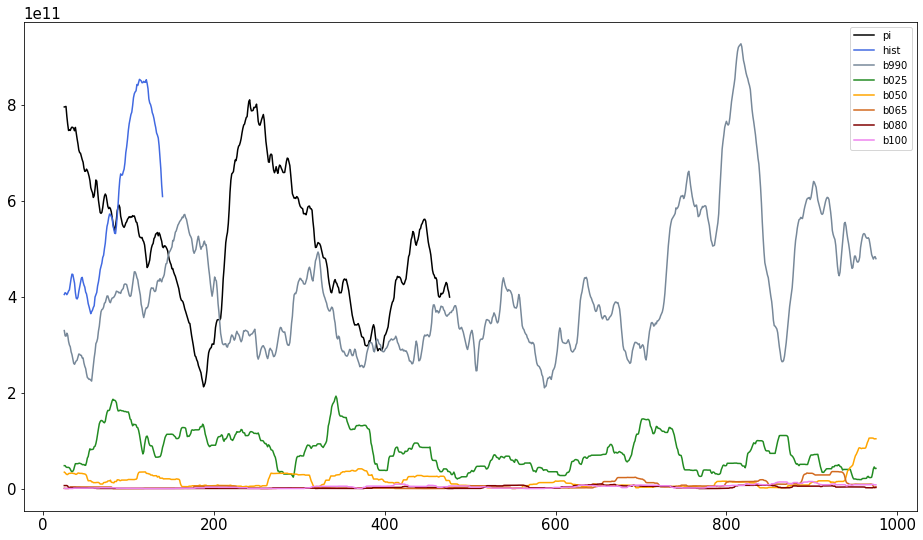

In [5]:
fig = plt.figure(figsize = (16,9))
for ru, col in zip(allru, colors):
    lowdepco = ctl.running_mean(deepco[(ru, 2000)], 50)
    plt.plot(lowdepco, color = col, label = ru)

plt.legend()

pi
b990
b025
b050
b065
b080
b100


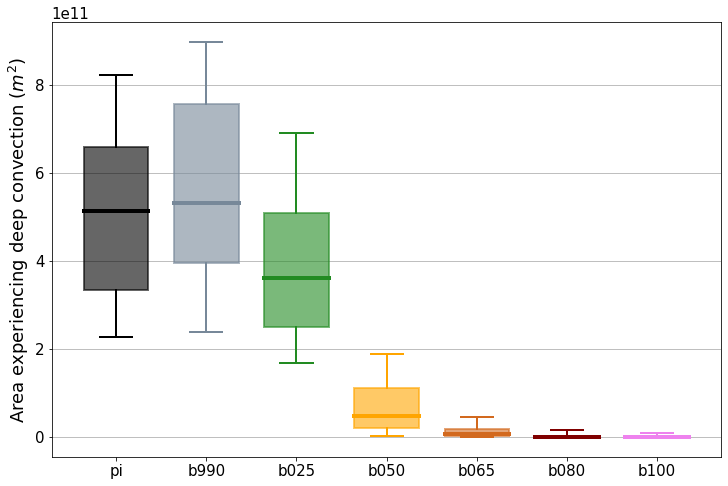

In [9]:
allruok = ['pi', 'b990', 'b025', 'b050', 'b065', 'b080', 'b100']
colors_ok = ['black', 'lightslategray', 'forestgreen', 'orange', 'chocolate', 'maroon', 'violet']

cose = [ctl.running_mean(deepco[(ru, 2000)], 10, remove_nans=True) for ru in allru]
#cose = [deepco[(ru, 2000)] for ru in allru]
names = allruok

edgecol = colors_ok
fullcol = colors_ok

positions = 0.7 * np.arange(len(allruok))

fig, ax = ctl.boxplot(cose, names, fullcol, positions = positions, edge_colors = edgecol, plot_mean = False, plot_minmax = False, plot_ensmeans = False)
ax.set_xticks(positions)
ax.set_xticklabels(allruok)
ax.grid(axis = 'y')

ax.set_ylabel(r'Area experiencing deep convection $(m^2)$')

fig.savefig(cart_out + 'convection_boxplot.pdf')


### Estimate of heat flux due to convection in one year of piControl

In [7]:
carto = '/nas/archive_CMIP6/CMIP6/model-output/EC-Earth-Consortium/EC-Earth3/piControl/ocean/Omon/r1i1p1f1/'

filist = glob.glob(carto + 'bigthetao/bigthetao*nc')
filist.sort()
filok = filist[110:120]
theta = xr.open_mfdataset(filok, use_cftime = True)['bigthetao']

filist = glob.glob(carto + 'masscello/masscello*nc')
filist.sort()
filok = filist[110:120]
mass = xr.open_mfdataset(filok, use_cftime = True)['masscello']

filist = glob.glob(carto + 'mlotstmax/mlotstmax*nc')
filist.sort()
filok = filist[110:120]
mldep = xr.open_mfdataset(filok, use_cftime = True)['mlotstmax']

deepco = mldep > 2000.
np.sum(deepco)

profi = theta.where(deepco).mean(('time', 'i', 'j'))

It appears that the columns undergoing convection are warmer at the surface.. but yet this is not instantaneous, so..

In [8]:
profi.plot(y = 'lev')
plt.gca().invert_yaxis()

KeyboardInterrupt: 

In [ ]:
filist = glob.glob(carto + 'wo/wo*nc')
filist.sort()
filok = filist[110:120]
wo = xr.open_mfdataset(filok, use_cftime = True)['wo']


In [ ]:
wo_ok = wo.interp(lev = theta.lev)

In [ ]:
fia = cart_out + 'areacello_Ofx_EC-Earth3_stabilization-ssp585-2050_r1i1p1f1_gn.nc' # areacello is the same for all
gigi_a = xr.load_dataset(fia, use_cftime = True)['areacello']

fia = cart_out + 'thkcello_Omon_EC-Earth3_piControl_r1i1p1f1_gn_225901-225912.nc'
gigi_t = xr.load_dataset(fia, use_cftime = True)['thkcello']

gigi_t = gigi_t.mean('time')

In [ ]:
cp0 = 3989.245 # J/kg/K
rho0 = 1025
s2c = 86400*365*100
rho = mass/gigi_t #theta.lev.diff('lev')
oht1 = s2c*cp0*wo_ok*theta*rho*gigi_a
oht2 = s2c*cp0*rho0*wo_ok*theta*gigi_a

In [ ]:
oht1_glob = oht1.sum(('i', 'j')).mean('time')
oht2_glob = oht2.sum(('i', 'j')).mean('time')

oht1_glob.plot(y = 'lev', label = 'ok')
oht2_glob.plot(y = 'lev', label = 'rho0')
plt.gca().invert_yaxis()
plt.legend()
plt.grid()
plt.xlabel('Upward heat flux (J/cent)')

Text(0.5, 55.0, 'Upward heat flux (J/cent)')

In [ ]:
lats = np.linspace(-89.5, 89.5, 180)
lons = np.linspace(0, 359, 360)
theta_rg = ctl.regrid_dataset(theta, lats, lons)
print('ok')
rho_rg = ctl.regrid_dataset(rho, lats, lons)
print('ok')
oht1_rg = ctl.regrid_dataset(oht1, lats, lons)

Regridding...


/home/fabiano/local_bin/anaconda3/envs/ctl4/lib/python3.9/site-packages/dask/array/core.py:454: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  o = func(*args, **kwargs)


Regridding completed in 0:00:03.349352
ok
Regridding...


/home/fabiano/local_bin/anaconda3/envs/ctl4/lib/python3.9/site-packages/dask/array/core.py:454: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  o = func(*args, **kwargs)


Regridding completed in 0:00:01.774456
ok
Regridding...
Regridding completed in 0:00:01.739945


In [ ]:
theta_rg = theta_rg.mean('time')
rho_rg = rho_rg.mean('time')
oht1_rg = oht1_rg.mean('time')

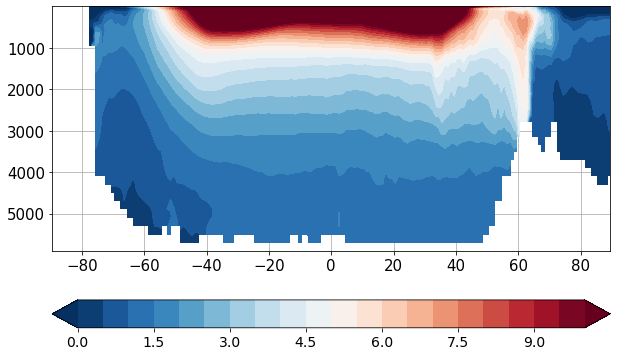

In [ ]:
ctl.plot_lat_crosssection(theta_rg.mean('lon'), theta_rg.lat, theta_rg.lev, cbar_range= (0., 10.))

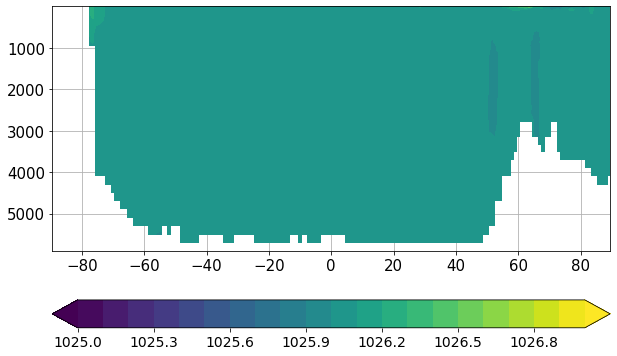

In [ ]:
ctl.plot_lat_crosssection(rho_rg.mean('lon'), rho_rg.lat, rho_rg.lev, cmap = 'viridis', cbar_range = (1025, 1027))

In [ ]:
oht1_rg = oht1_rg.compute()

In [ ]:
%matplotlib inline

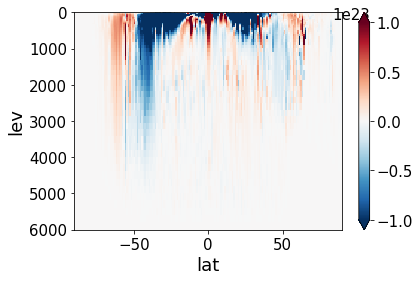

In [ ]:
# ctl.plot_lat_crosssection(oht1_rg.sum('lon'), oht1_rg.lat, oht1_rg.lev, plot_anomalies=True, cbar_range = (-5e20, 5e20))
oht1_rg.sum('lon').plot(y = 'lev', vmax = 1e23)
plt.gca().invert_yaxis()

In [ ]:
oht1 = oht1.compute()

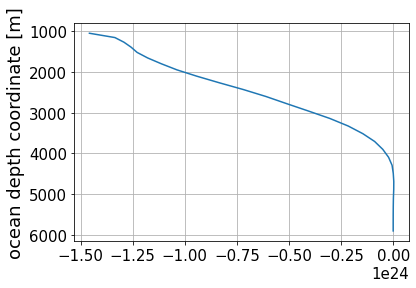

In [ ]:
oht1.mean('time').sum(['i', 'j']).sel(lev = slice(1000, None)).plot(y = 'lev')
plt.gca().invert_yaxis()
plt.grid()

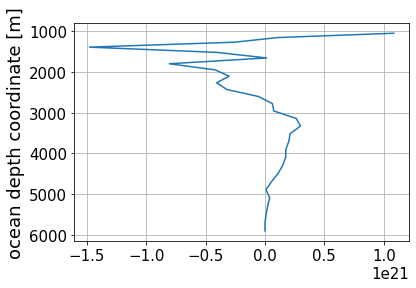

In [ ]:
oht1.mean('time').differentiate('lev').sum(['i', 'j']).sel(lev = slice(1000, None)).plot(y = 'lev')
plt.gca().invert_yaxis()
plt.grid()

In [ ]:
wo_rg = ctl.regrid_dataset(wo_ok, lats, lons)
wo_rg = wo_rg.mean('time')
wo_rg = wo_rg.compute()


Regridding...


/home/fabiano/local_bin/anaconda3/envs/ctl4/lib/python3.9/site-packages/dask/array/core.py:454: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  o = func(*args, **kwargs)


Regridding completed in 0:00:01.786944


In [ ]:
theta_rg = theta_rg.compute()

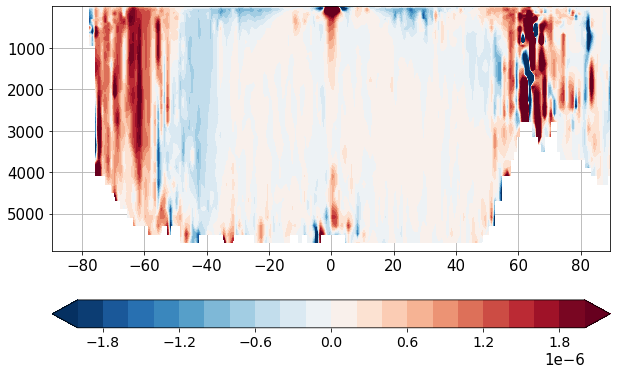

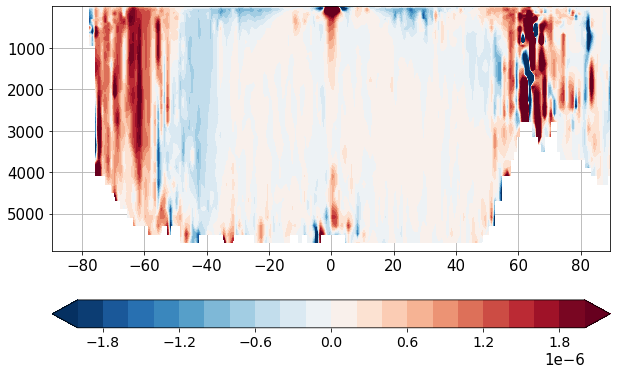

In [ ]:
#ctl.plot_lat_crosssection(wo_rg.mean('lon'), wo_rg.lat, wo_rg.lev, plot_anomalies=True, cbar_range = (-2e-6, 2e-6))

wo_rg.mean('lon').sel(lev = slice(1000, None), lat = slice(-90, 0)).plot(y = 'lev', vmax = 2e-6)

### Added vs redistributed heat in b050?

In [ ]:
cart50 = '/nas/BOTTINO/ocean/'

theta_b050 = xr.open_mfdataset(cart50 + 'bigthetao*nc', use_cftime = True)['bigthetao']
wo_b050 = xr.open_mfdataset(cart50 + 'wo*nc', use_cftime = True)['wo']
theta_b050 = theta_b050.mean('time')
wo_b050 = wo_b050.mean('time')
wo_b050_ok = wo_b050.interp(lev = theta_b050.lev)

wo_b050_rg = ctl.regrid_dataset(wo_b050_ok, lats, lons)
theta_b050_rg = ctl.regrid_dataset(theta_b050, lats, lons)


Regridding...


/home/fabiano/local_bin/anaconda3/envs/ctl4/lib/python3.9/site-packages/dask/array/core.py:454: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  o = func(*args, **kwargs)


Regridding completed in 0:00:01.750295
Regridding...
Regridding completed in 0:00:01.744940


In [ ]:
wo_b050_rg = wo_b050_rg.compute()
theta_b050_rg = theta_b050_rg.compute()

In [ ]:
addhe = wo_rg * (theta_b050_rg - theta_rg)
redhe = (wo_b050_rg - wo_rg) * theta_rg
nlhe = (wo_b050_rg * theta_b050_rg) - (wo_rg * theta_rg) - addhe - redhe

addhe_conv = addhe.differentiate('lev')
redhe_conv = redhe.differentiate('lev')
nlhe_conv = nlhe.differentiate('lev')

In [ ]:
%matplotlib inline

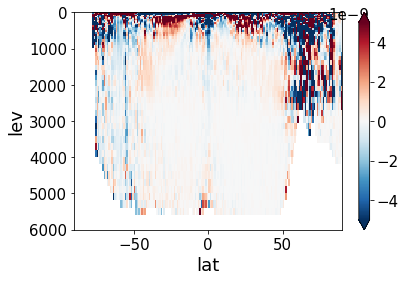

In [ ]:
addhe_conv.mean('lon').plot(y = 'lev', vmax = 5e-9)
plt.gca().invert_yaxis()

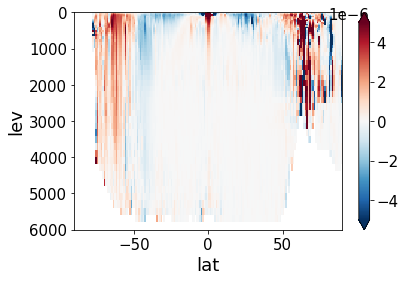

In [ ]:
addhe.mean('lon').plot(y = 'lev', vmax = 5e-6)
plt.gca().invert_yaxis()

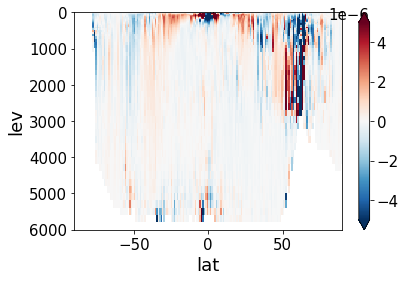

In [ ]:
redhe.mean('lon').plot(y = 'lev', vmax = 5e-6)
plt.gca().invert_yaxis()

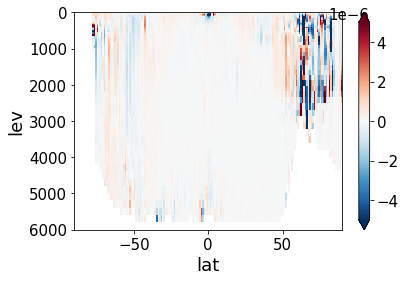

In [ ]:
nlhe.mean('lon').plot(y = 'lev', vmax = 5e-6)
plt.gca().invert_yaxis()

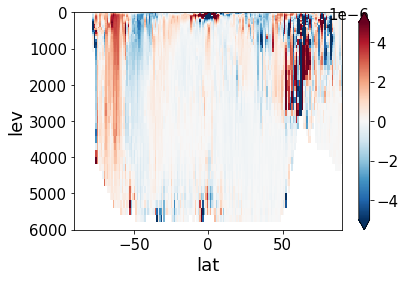

In [ ]:
tot = (wo_b050_rg * theta_b050_rg) - (wo_rg * theta_rg)
#tot_conv = tot.differentiate('lev')
tot.mean('lon').plot(y = 'lev', vmax = 5e-6)
plt.gca().invert_yaxis()

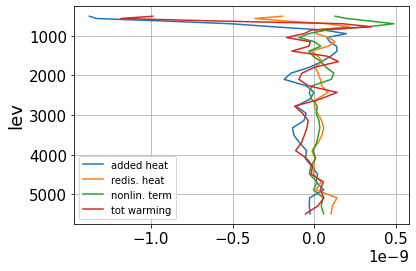

In [ ]:
addhe_conv.mean(['lon', 'lat']).sel(lev = slice(500., None)).plot(y = 'lev', label = 'added heat')
redhe_conv.mean(['lon', 'lat']).sel(lev = slice(500., None)).plot(y = 'lev', label = 'redis. heat')
nlhe_conv.mean(['lon', 'lat']).sel(lev = slice(500., None)).plot(y = 'lev', label = 'nonlin. term')
tot_conv.mean(['lon', 'lat']).sel(lev = slice(500., None)).plot(y = 'lev', label = 'tot warming')
plt.gca().invert_yaxis()
plt.grid()
plt.legend()


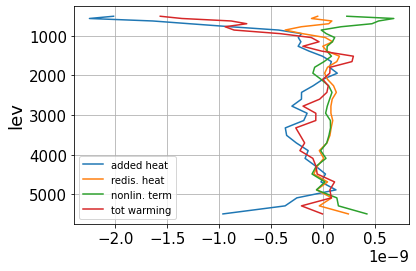

In [ ]:
addhe_conv.sel(lat = slice(-90, -35)).mean(['lon', 'lat']).sel(lev = slice(500., None)).plot(y = 'lev', label = 'added heat')
redhe_conv.sel(lat = slice(-90, -35)).mean(['lon', 'lat']).sel(lev = slice(500., None)).plot(y = 'lev', label = 'redis. heat')
nlhe_conv.sel(lat = slice(-90, -35)).mean(['lon', 'lat']).sel(lev = slice(500., None)).plot(y = 'lev', label = 'nonlin. term')
tot_conv.sel(lat = slice(-90, -35)).mean(['lon', 'lat']).sel(lev = slice(500., None)).plot(y = 'lev', label = 'tot warming')
plt.gca().invert_yaxis()
plt.grid()
plt.legend()

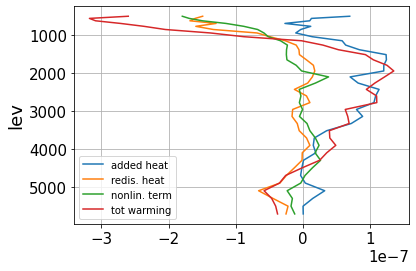

In [ ]:
addhe.mean(['lon', 'lat']).sel(lev = slice(500., None)).plot(y = 'lev', label = 'added heat')
redhe.mean(['lon', 'lat']).sel(lev = slice(500., None)).plot(y = 'lev', label = 'redis. heat')
nlhe.mean(['lon', 'lat']).sel(lev = slice(500., None)).plot(y = 'lev', label = 'nonlin. term')
tot.mean(['lon', 'lat']).sel(lev = slice(500., None)).plot(y = 'lev', label = 'tot warming')
plt.gca().invert_yaxis()
plt.grid()
plt.legend()

That's it, the resolved transport is actually transporting less heat to the deep ocean with respect to the pre-industrial.. so that's not the warming term we are looking at.

### Timeseries of the vertical ocean heat transport in pi

In [9]:
oht_all = pickle.load(open(cart_out + 'ohtrans_mean.p', 'rb'))

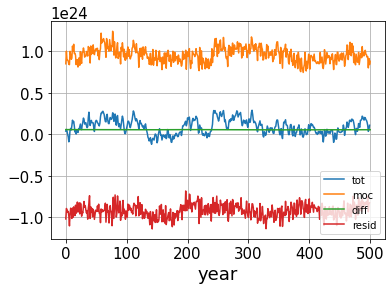

In [25]:
%matplotlib inline

fig = plt.figure()
tot_trans_pi = 100*oht_all[('pi', 'deep')].differentiate('year')
tot_trans_pi.plot(label = 'tot')
(-oht_all[('pi', 'moc', 2000)]).plot(label = 'moc')
(-oht_all[('pi', 'diff', 2000)]).plot(label = 'diff')
resid = tot_trans_pi + oht_all[('pi', 'moc', 2000)][1:] + oht_all[('pi', 'diff', 2000)][1:]
resid.plot(label = 'resid')
plt.legend()
plt.grid()

The resolved transport by advection (w\*T, orange) is much more than the effective total transport (blue) inferred from the derivative of the total heat content. The vertical diffusion estimated by K\*dT/dz with K~1e-5 is shown by the green line. The missing term in the balance (red) is also shown.. It is a cooling term, what is it? Convection? Isopycnal diffusion?

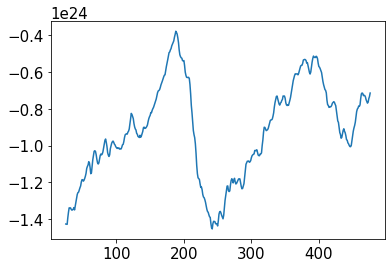

In [29]:
lowdepco = ctl.running_mean(deepco[('pi', 2000)], 50)
plt.plot(lowdepco * np.nanmean(resid)/np.nanmean(lowdepco))

In [47]:
ctl.Rcorr(deepco[('pi', 2000)][1:], tot_trans_pi.values)
#ctl.Rcorr(deepco[('pi', 2000)][1:], resid.values)

0.1955990359470417

In [46]:
ctl.Rcorr(lowdepco[1:], ctl.running_mean(tot_trans_pi.values, 20))
#ctl.Rcorr(lowdepco[1:], ctl.running_mean(resid.values, 20))

0.5593024046283777

The area with maximum mixed layer depth > 2000 m correlates slightly with the total heat transport (after smoothing)

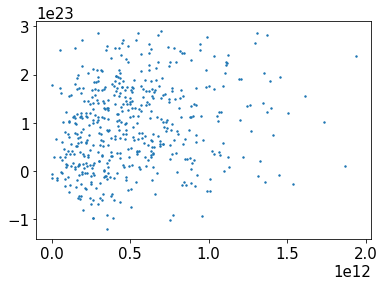

In [38]:
fig = plt.figure()
plt.scatter(deepco[('pi', 2000)][1:], tot_trans_pi.values, s = 2)

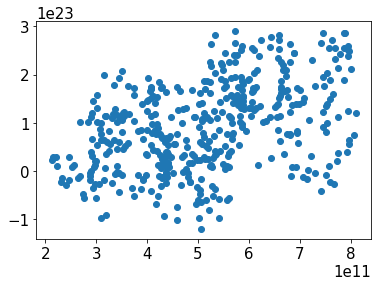

In [48]:
fig = plt.figure()
plt.scatter(lowdepco[1:], tot_trans_pi)

In [51]:
ctl.Rcorr(deepco[('pi', 2000)], oht_all[('pi', 'moc', 2000)].values)

-0.1569824983291614

In [57]:
ctl.Rcorr(ctl.running_mean(deepco[('pi', 2000)], 20), ctl.running_mean(oht_all[('pi', 'moc', 2000)], 20))

-0.3618154338137339

In [59]:
ctl.Rcorr(ctl.running_mean(tot_trans_pi, 20), ctl.running_mean(oht_all[('pi', 'moc', 2000)], 20)[1:])

-0.8045041332123931

The total heat transport is very correlated with the resolved advective transport (after smoothing)..